## Random sample imputation
Random sample imputation consist of taking random 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
df=pd.read_csv("titanic.csv",usecols=['Age',"Fare","Survived"])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [15]:
for i in feature_na:
    print(i,np.round(df[i].isnull().mean(),4),"% missing values")

Age 0.1987 % missing values


In [20]:
df['Age'].isnull().sum()

177

In [21]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

68     17.0
785    25.0
369    24.0
607    27.0
737    35.0
       ... 
378    20.0
353    25.0
705    39.0
391    21.0
767    30.5
Name: Age, Length: 177, dtype: float64

In [25]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [43]:
def imputation(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df['Age'].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [44]:
median=df.Age.median()

In [45]:
imputation(df,"Age",median)

In [46]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [47]:
df['Age_random'].mean()

29.700347923681257

In [48]:
df['Age_median'].mean()

29.36158249158249

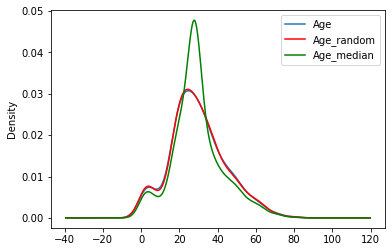

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
df.Age_median.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

 ### Advantages
1. Easy To implement
2. There is less distortion in variance


### Disadvantage
1. Every situation randomness wont work

## Capturing nan values with new features

In [54]:
df=pd.read_csv("titanic.csv",usecols=['Age',"Fare","Survived"])

In [55]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [61]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [62]:
df.head(50)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


 ## Advantages
1. Easy to implement
2. Captures the importance of missing values


## Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

### End of distribution imputation

In [63]:
df=pd.read_csv("titanic.csv",usecols=['Age',"Fare","Survived"])

In [64]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

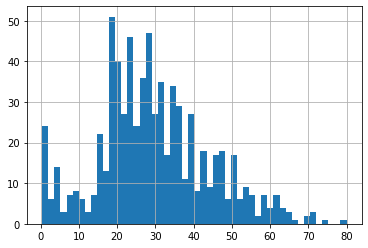

In [67]:
df.Age.hist(bins=50)

In [76]:
extreme=df.Age.mean()+3*df.Age.std()

In [71]:
df.Age.std()

14.526497332334044

<AxesSubplot:xlabel='Age'>

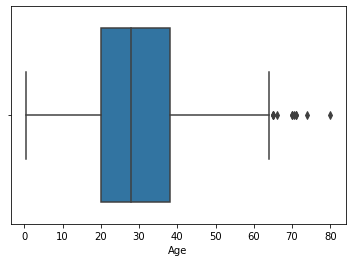

In [74]:
sns.boxplot("Age",data=df)

In [77]:
def imputation(df,variable,median,extreme):
    df[variable+"_end_dist"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
   

In [78]:
imputation(df,'Age',df.Age.median(),extreme)

In [79]:
df.head()

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

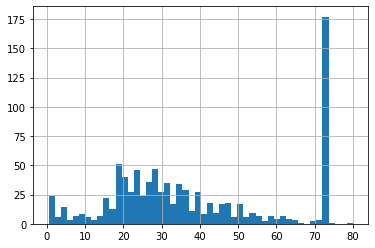

In [80]:
df.Age_end_dist.hist(bins=50)

<AxesSubplot:>

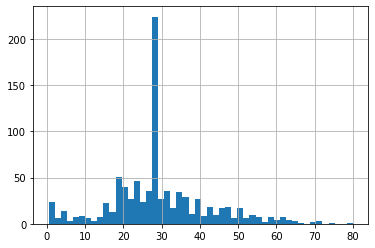

In [83]:
df.Age.hist(bins=50)

C:\Users\samcs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_dist'>

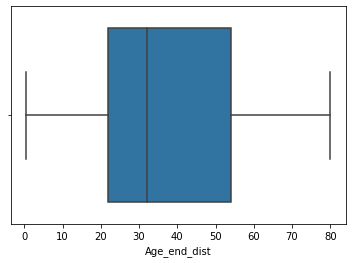

In [84]:
sns.boxplot(df['Age_end_dist'],data=df)

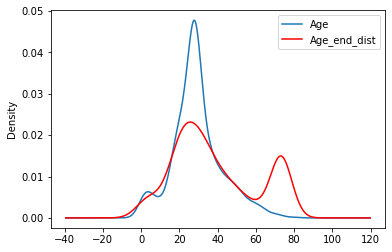

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_end_dist.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')